# Lab 2 - Linear regression
## Linear regression with one variable

Please import basic libraries and database::

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In this project, we will implement a linear regression model with one variable to predict profits for a food truck. The file Dane contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [2]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1. Use the head and describe function to examine the data and display few columns. <br>

Ex. 2. Extract data from pandas structure to new variables of ndarray type and plot the data, where: x - population, y - profit.

In [3]:
#Ex1
data.head(10)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


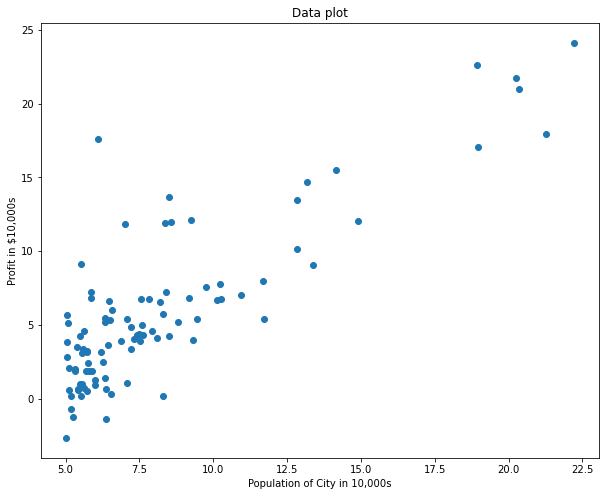

In [5]:
#Ex2
x = data.values[:, 0]
y = data.values[:, 1]

figure(figsize=(10, 8))
plt.scatter(x, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Data plot')
plt.show()

Ex. 3. In order to make the cost function work (intercept value θo has to be multiplied by 1) we need to insert a column of ones at the top of x. <br>

Ex. 4. We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter θ.

In [6]:
#Ex3 & Ex4
X = np.stack([np.ones(x.shape, dtype=np.float32),x], axis=1)
y.shape = [ y.shape[0],1]
theta = np.zeros((X.shape[1], 1), dtype=np.float32)

Ex. 5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. <br>

Please write the cost function based on X, y and parameter θ.

In [7]:
#Ex5

X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(theta)

def computeCost(X, y, theta):
    m = X.shape[0]
    SUM = np.sum(np.square(((X * theta) - y)))
    J = (1/(2*m)) * SUM
    return J

Ex. 6 Test the cost function with (θ = 0)

In [8]:
#Ex 6
theta_0 = computeCost(X, y, theta)
print('Output of cost function with θ=0 : {:.2f}'.format(theta_0))

Output of cost function with θ=0 : 32.07


Ex. 7 Please implement the gradient descent algorithm:

In [9]:
#Ex 7

def simple_gradient(X, y, theta, alpha, it):
    m = X.shape[0]
    iteration = it
    cost = []
    for i in range(iteration):
        h0 = X * theta
        theta = theta - (alpha * (1/m) * np.transpose(X)  * (h0-y))
        cost.append(computeCost(X, y, theta))
    return theta, cost

Ex. 8 Please calculate the optimal parameters for the dataset.

In [10]:
# Ex 8
alpha = 0.01
it = 1000
opt_theta, cost = simple_gradient(X, y, theta, alpha, it)

opt_theta

matrix([[-3.24140214],
        [ 1.1272942 ]])

Ex. 9 Please calculate the cost function for the given θ (Ex.8).

In [11]:
# Ex 9
print('The cost function for the optimal parameter is {:.2f}'.format(computeCost(X, y, opt_theta)))

The cost function for the optimal parameter is 4.52


Ex. 10 Plot the regression function and our dataset.

Text(0.5, 1.0, 'Data plot')

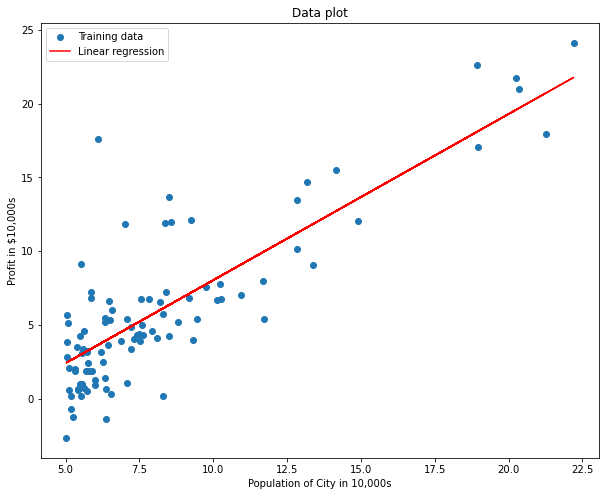

In [12]:
# Ex 10

y1= data.values[:, 1]
y2= opt_theta.flat[0] + (opt_theta.flat[1] * x)

figure(figsize=(10, 8))
plt.scatter(x, y1)
plt.plot(x, y2, color='r')
plt.legend(['Training data', 'Linear regression'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Data plot')

Ex. 11 Plot the relationship between the cost function and number of iterations.

Text(0.5, 1.0, 'Cost function vs iteration')

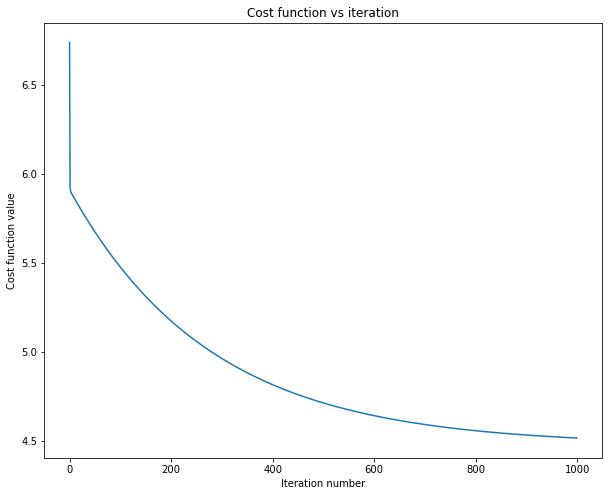

In [13]:
# Ex 11

figure(figsize=(10, 8))
plt.plot(range(len(cost)), cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.title('Cost function vs iteration')

## Linear regression with multiple variables

In [14]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head(10)

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


Ex. 1. Notice that the scale of the values for each variable is vastly different. A house will typically have 2-5 bedrooms but may have anywhere from hundreds to thousands of square feet. To fix this, we need to do something called “feature normalization”. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation (2 lines of code).

In [15]:
# Ex 1
for col in data2:
    data2[col] = (data2[col]-data2[col].mean()) / (data2[col].std())
    
data2.head(10)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


Ex.2 Please perform steps 3-11 from the previous task by using the same functions.

Text(0.5, 0.92, '3D scatter plot')

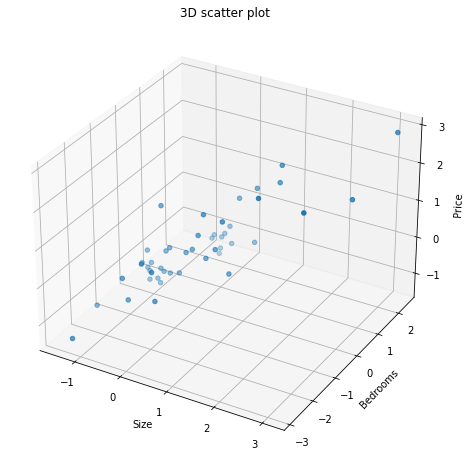

In [16]:
figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(data2['Size'], data2['Bedrooms'], data2['Price'])
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title('3D scatter plot')

In [17]:
X_1  = np.stack((np.ones(data2.shape[0]),data2['Size'],data2['Bedrooms']),axis = 1)
y_1 = data2[["Price"]]

X_1 = np.matrix(X_1)
y_1 = np.matrix(y_1)
theta_1 = np.zeros((X_1.shape[1],1))

In [18]:
print('Output of cost function with θ=0 : {:.2f}'.format(computeCost(X_1,y_1,theta_1)))

Output of cost function with θ=0 : 0.49


In [19]:
opt_theta_1, cost_1 = simple_gradient(X_1, y_1, theta_1, alpha, it)

opt_theta_1

matrix([[-1.03161837e-16],
        [ 8.78503652e-01],
        [-4.69166570e-02]])

In [20]:
print('The cost function for the optimal parameter is {:.2f}'.format(computeCost(X_1, y_1, opt_theta_1)))

The cost function for the optimal parameter is 0.13


In [21]:
print('Output of cost function with θ=0 : {:.2f}'.format(computeCost(X_1, y_1, theta_1)))

Output of cost function with θ=0 : 0.49


Text(0.5, 0, 'Price')

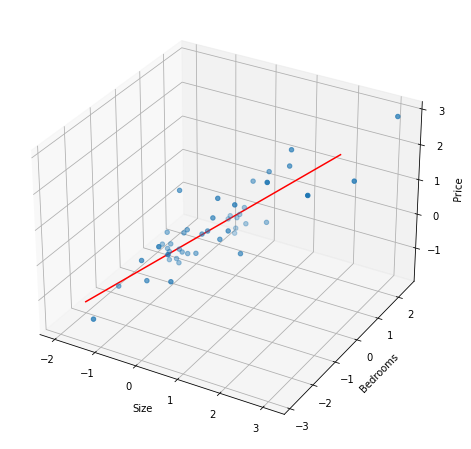

In [22]:
xx = np.arange(-2, 3)
yy = np.arange(-2, 3)

figure(figsize=(10, 8))
ax = plt.axes(projection ='3d') 
ax.scatter(data2['Size'], data2['Bedrooms'], data2['Price'])
ax.plot(xx, yy, opt_theta_1.flat[0] + opt_theta_1.flat[1]*xx + opt_theta_1.flat[2] * yy, 'r')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

## Linear regression - Python packages

In [23]:
from random import random
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
import os
path = os.getcwd() + '/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
 
# Normalization
for col in data:
    data[col] = (data[col]-data[col].mean()) / (data[col].std())
 
# Split into train and test sets (70-30%)
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [0.87347386 0.01235155]
Residual sum of squares: 0.14238327576733
